# Workbook 9
This workbook focuses on multilevel modeling.

# Multilevel modeling: examining clusters
Multilevel modeling is a set of statistics that controls for clusters within data. Clusters can be anything that is grouping observations together. For example, multilevel modeling is popular within education studies because they control for students nested within classrooms within schools. I use multilevel modeling in my research because I control for geographic areas like tracts nested within counties nested within states. You can also do panel analysis within multilevel analysis where you group times within a person.

cross-sectional, three levels 
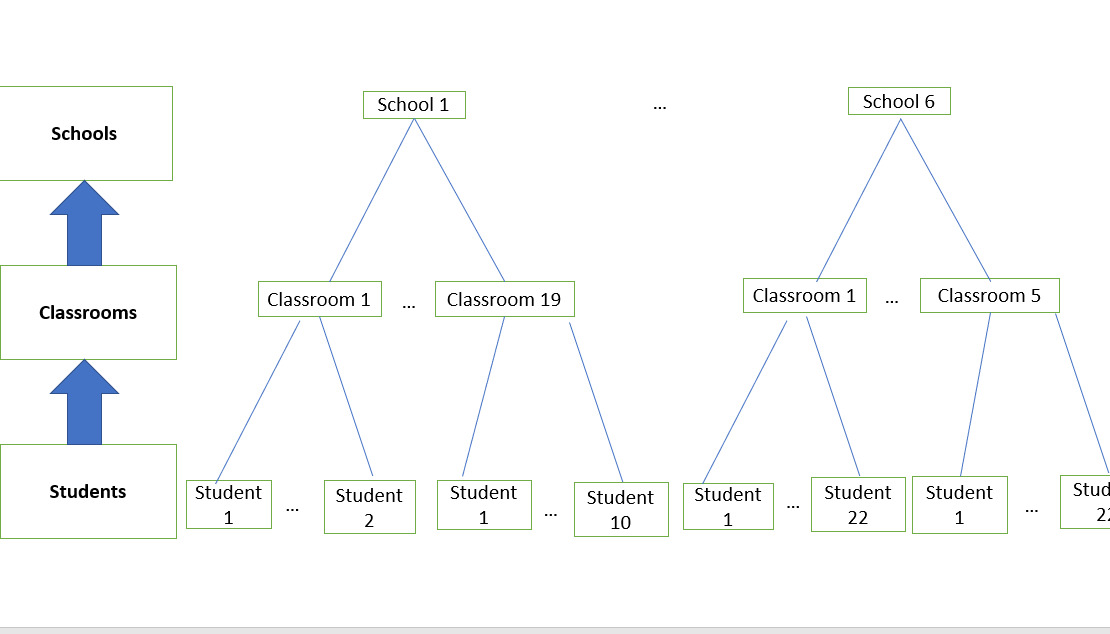

cross-sectional, three levels
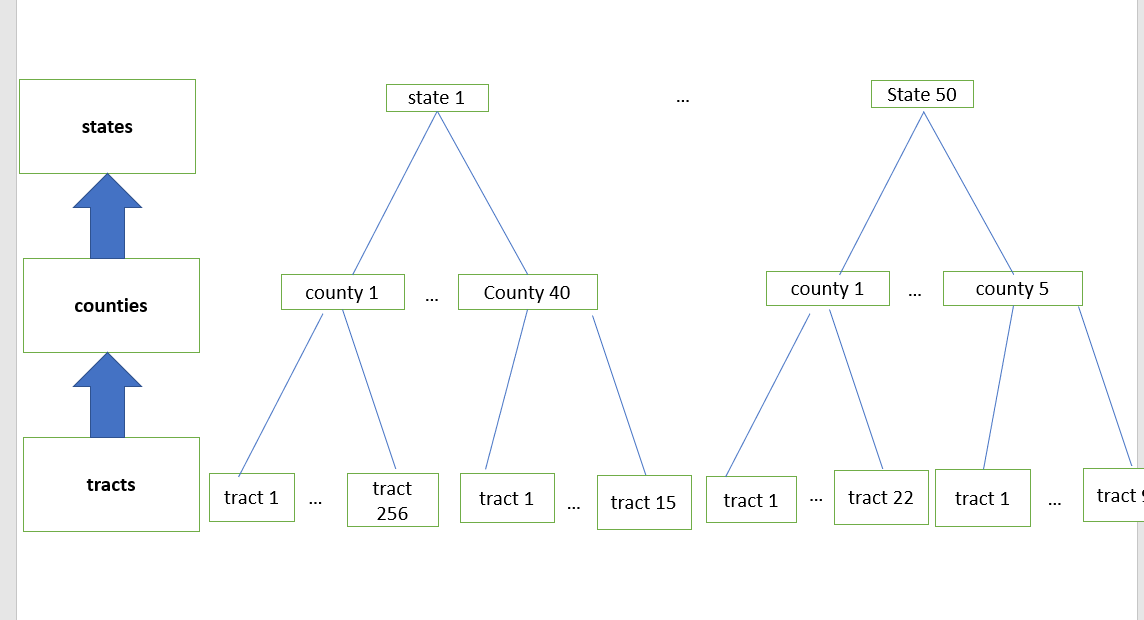

panel, two levels
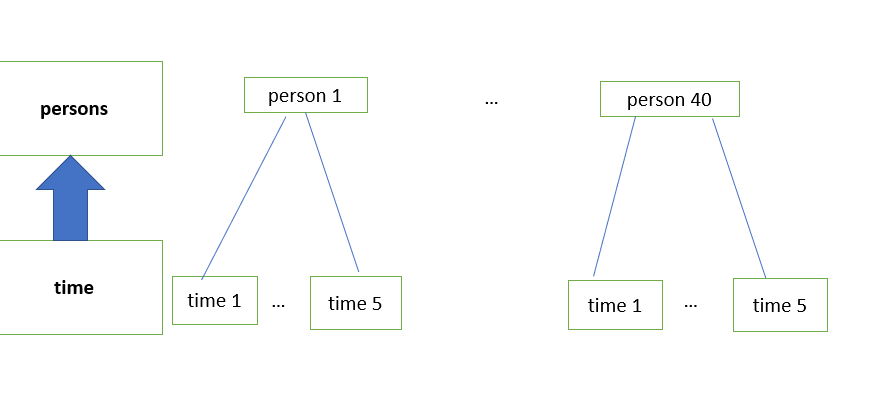

<b> This is how multilevel level data looks like in Stata:</b>
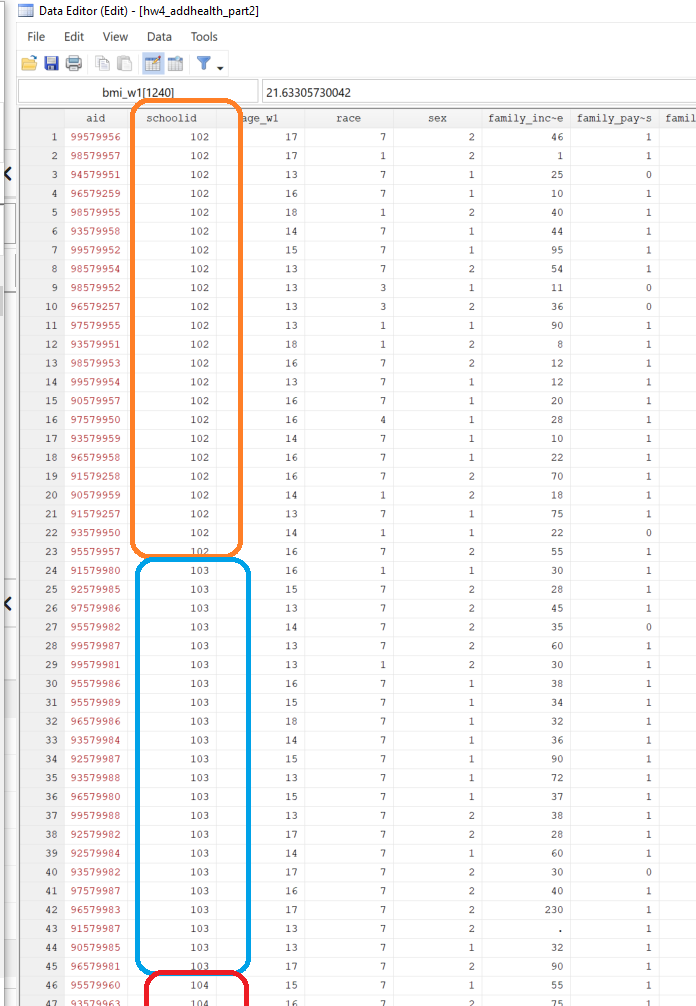

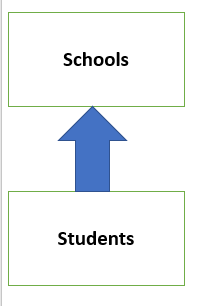

### National Longitudinal Study of Adolescent to Adult Health (ADD Health)
We will be practicing with a subset of the add health data. We will only doing cross-sectional analysese meaning we are only looking at data over a specific time point.

The data is of adolescents (unit of analysis).

<b>aid</b>----individual id

<b>schoolid</b>----school id

<b>bmi_w1</b>--BMI at wave 1

<b>female</b>---dummy variable of female

<b>age_w1</b>----age at Wave 1

<b>parent_highestedu</b>---parent's highest educational attainment where 1=less than high school; 2=high school; 3=some college; 4=college degree or more

## OLS Regression
In a OLS regression, we have points and we are estimating a model that best represents the relationship between x and y.

$y_i = \beta_0 + e_i$

where we assume the residuals are normally distributed and have $E(e_i)=0$ and $var(e_i)=\sigma^2$ where $e_i$ ~ $N(0,\sigma^2)$


C:\Users\acade\Documents\teaching\SOC 211 spring 2022\week 9



      Source |       SS           df       MS      Number of obs   =     6,210
-------------+----------------------------------   F(5, 6204)      =     50.14
       Model |  4687.96795         5  937.593589   Prob > F        =    0.0000
    Residual |  116010.991     6,204   18.699386   R-squared       =    0.0388
-------------+----------------------------------   Adj R-squared   =    0.0381
       Total |  120698.959     6,209  19.4393556   Root MSE        =    4.3243

-------------------------------------------------------------------------------
       bmi_w1 |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
--------------+----------------------------------------------------------------
     1.female |  -.2622226    .109896    -2.39   0.017    -.4776567   -.0467884
       age_w1 |    .419081   .0311469    13.45   0.000     .3580223    .4801396
              |
parent_high~u |
           1  |   1.259301  

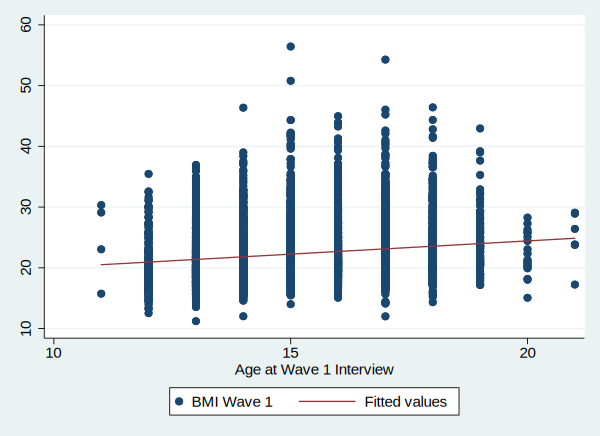




(file scatter_line_bmi_w1_age.png written in PNG format)


In [33]:
cd "C:\Users\acade\Documents\teaching\SOC 211 spring 2022\week 9"

use "addhealth.dta", clear

*estimates the OLS
regress bmi_w1 i.female age_w1 ib4.parent_highestedu
*makes a yhat (predicted values based on the OLS regression)
predict ols_bmi

*Graphs the actual data AND estimated OLS line
twoway (scatter bmi_w1 age_w1) ///
    (lfit ols_bmi age_w1)
graph export "scatter_line_bmi_w1_age.png", replace width(3400)

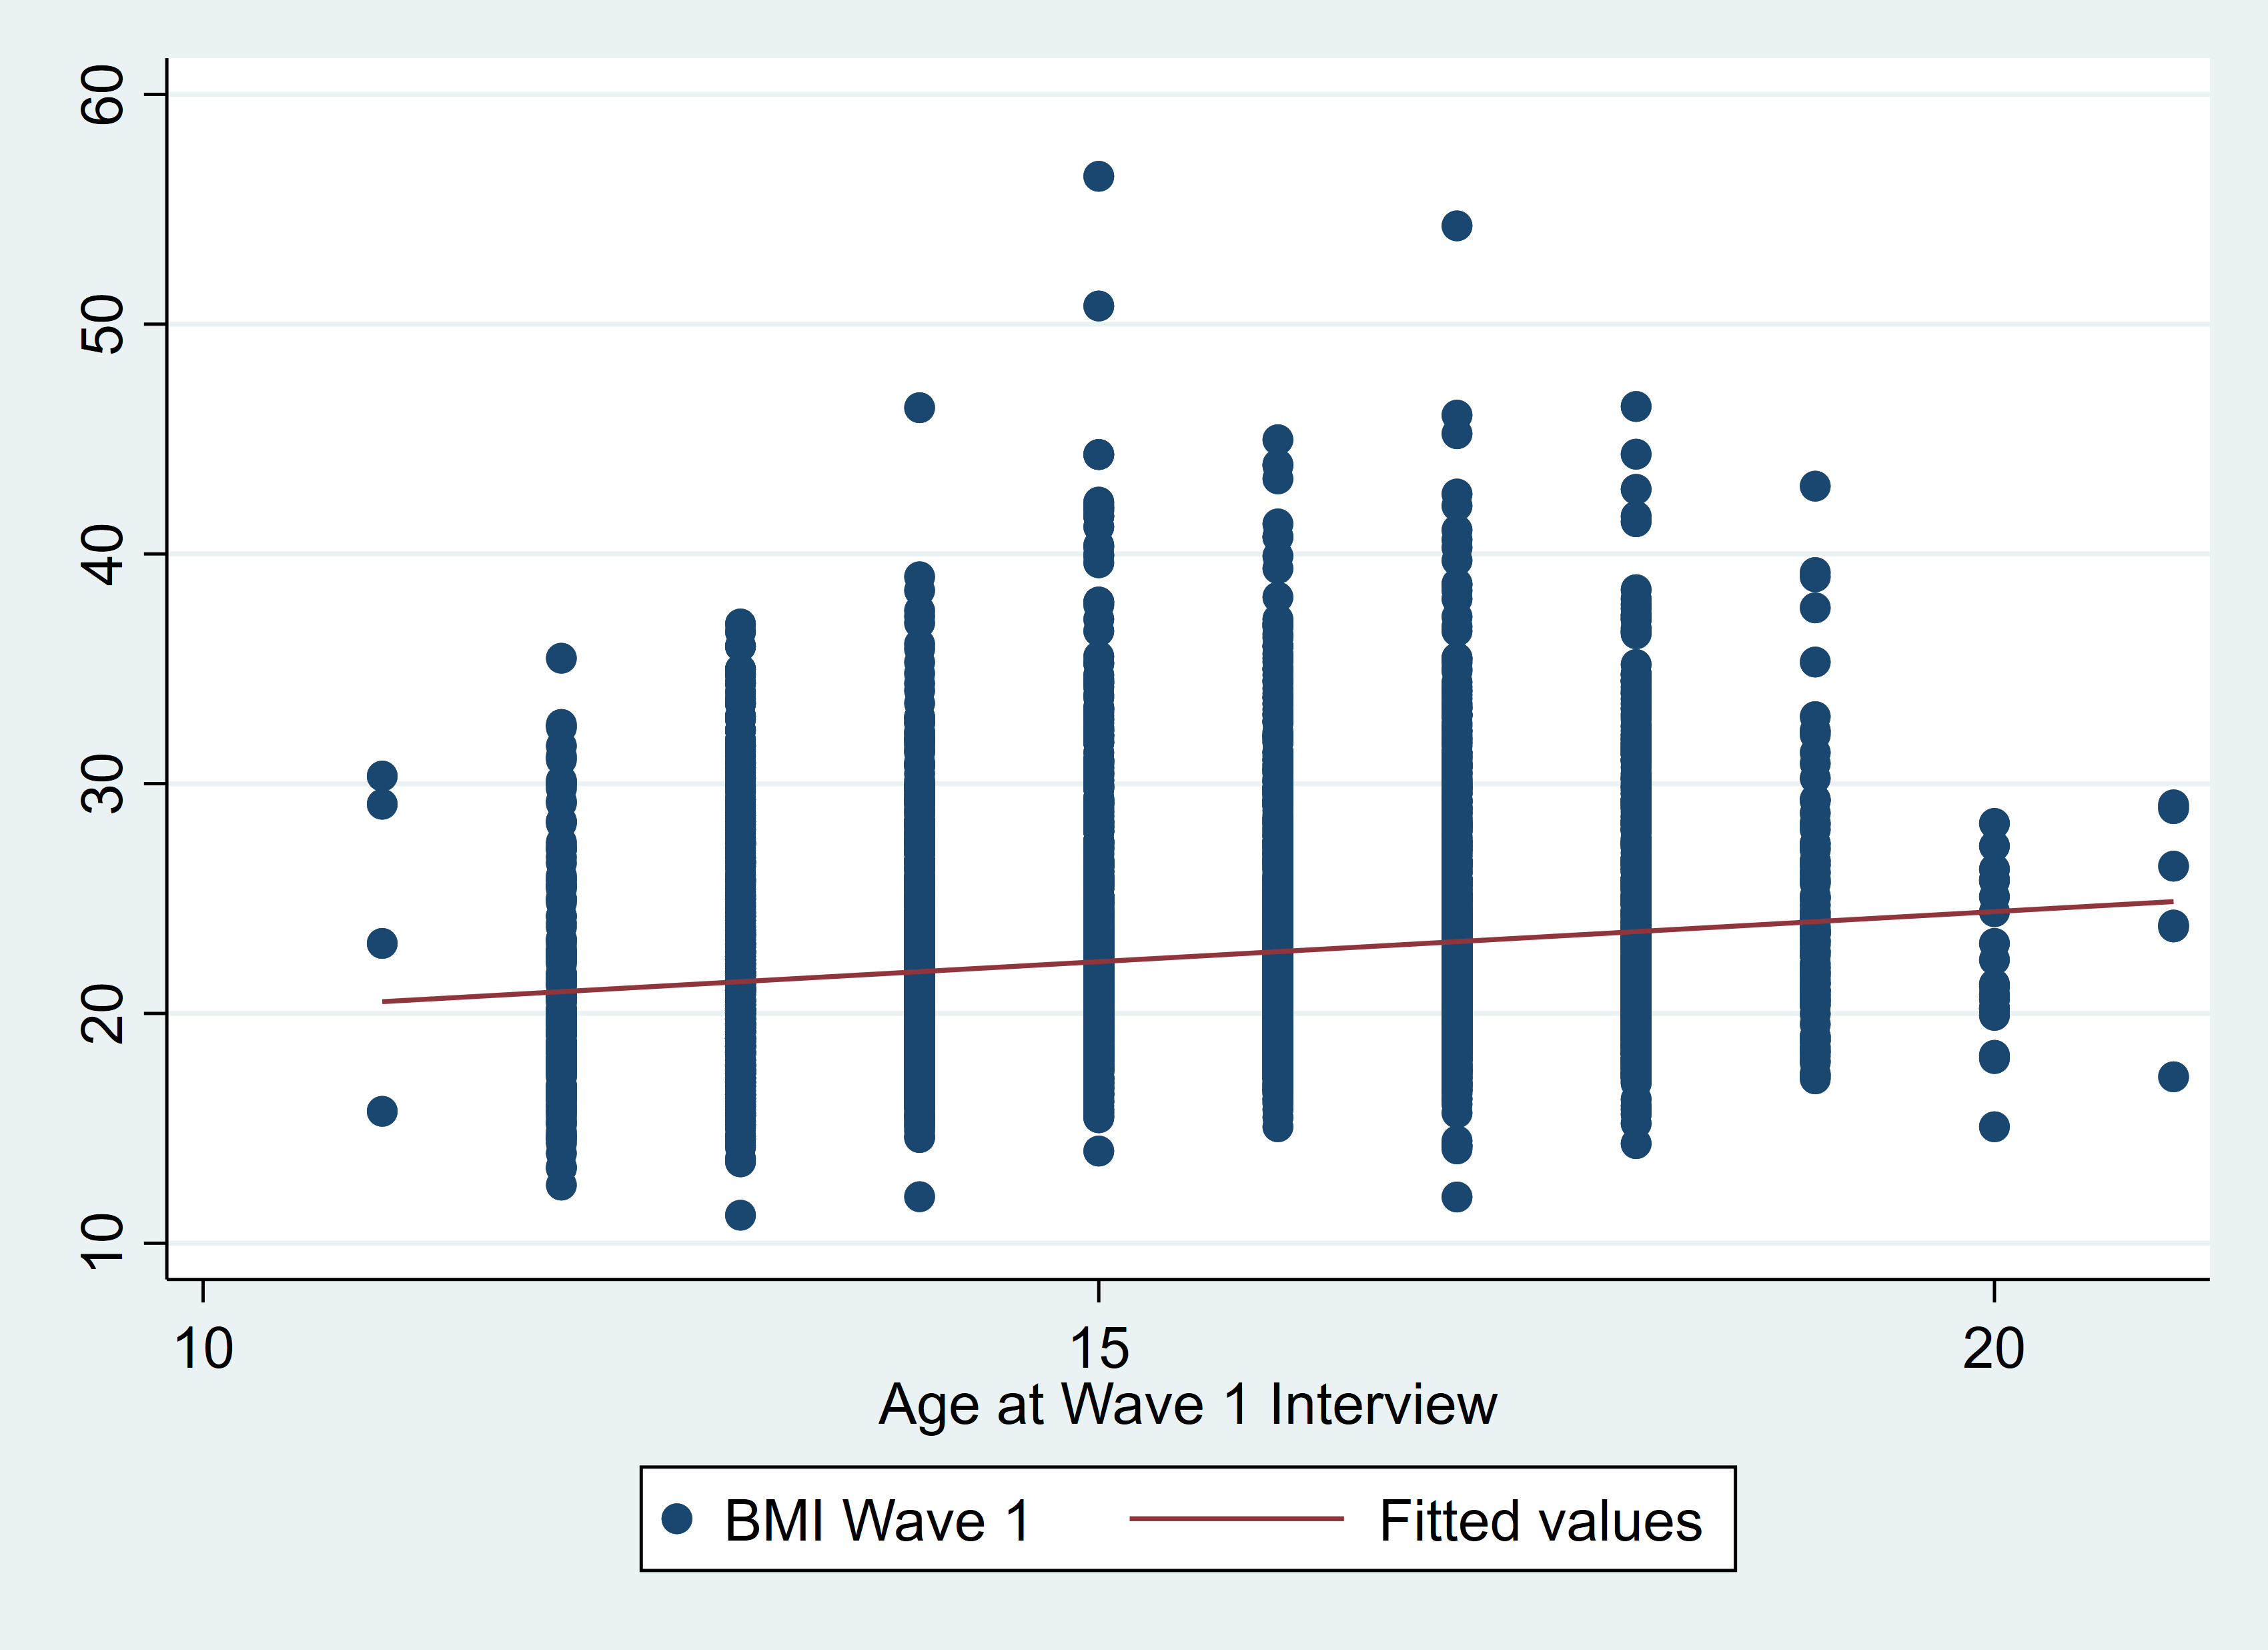

This model and figure DOES NOT account for the effect schools has on children.

# Why multilevel modeling?
Let's say, we have reason the group the data we ran with OLS. Like we need to group or cluster students within schools because schools have different grade and age levels. In that case, we can give every school it's own intercept or starting point, to account for each school.

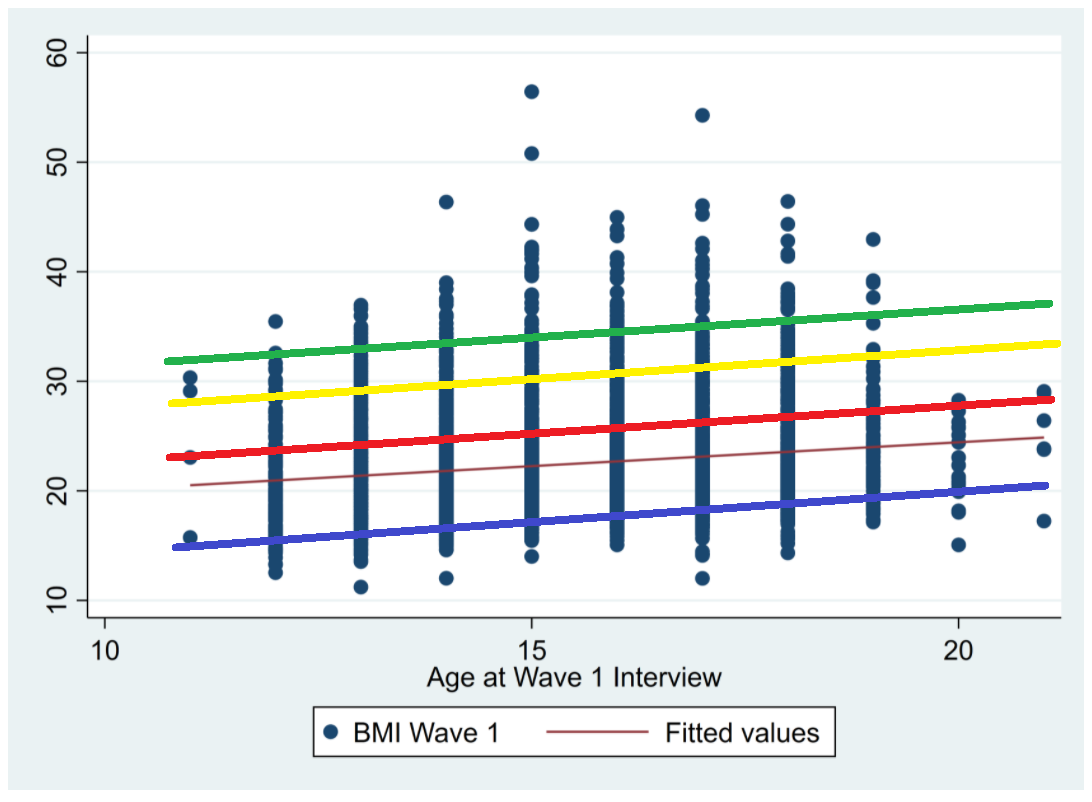

This figure has many different intercepts where some school have higher or lower bmi. The relationship/slope stays the same for every school, but every school has a separate starting point.

### Mathematics of the model...

This is a random-intercepts model (it is one of the most basic models in multilevel modeling)

Level 1 equation: $y_{ij} = \beta_{0j} + \beta_1*x_{1ij} + e_{0ij} $

Level 2 equation: $\beta_{0j} = \beta_0 + \mu_{0j}$

Combined model: $y_{ij} = (\beta_0 + \mu_{0j}) + \beta_1*x_{1ij} + e_{0ij}$

$y_{ij} = \beta_0 + \beta_1*x_{1ij} + \mu_0j + e_{0ij}$

where,

i is for i individual

j is for j school

Fixed part: $\beta_0 + \beta_1$

Random part (Level 2): $[\mu_{0j}]$ ~ $N(0,\sigma^2_{\mu0})$

Random part (Level 1): $[e_{0ij}]$ ~ $N(0,\sigma^2_{e0})$

In [16]:
*This how you run a multilevel model in Stata:
*mixed dependent_var independent_variable || secondlevel:
mixed bmi_w1 i.female age_w1 ib4.parent_highestedu || schoolid:


Performing EM optimization: 

Performing gradient-based optimization: 

Iteration 0:   log likelihood = -17871.852  
Iteration 1:   log likelihood = -17871.852  

Computing standard errors:

Mixed-effects ML regression                     Number of obs     =      6,210
Group variable: schoolid                        Number of groups  =        132

                                                Obs per group:
                                                              min =          8
                                                              avg =       47.0
                                                              max =        122

                                                Wald chi2(5)      =     162.00
Log likelihood = -17871.852                     Prob > chi2       =     0.0000

-------------------------------------------------------------------------------
       bmi_w1 |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
--------------+--------------

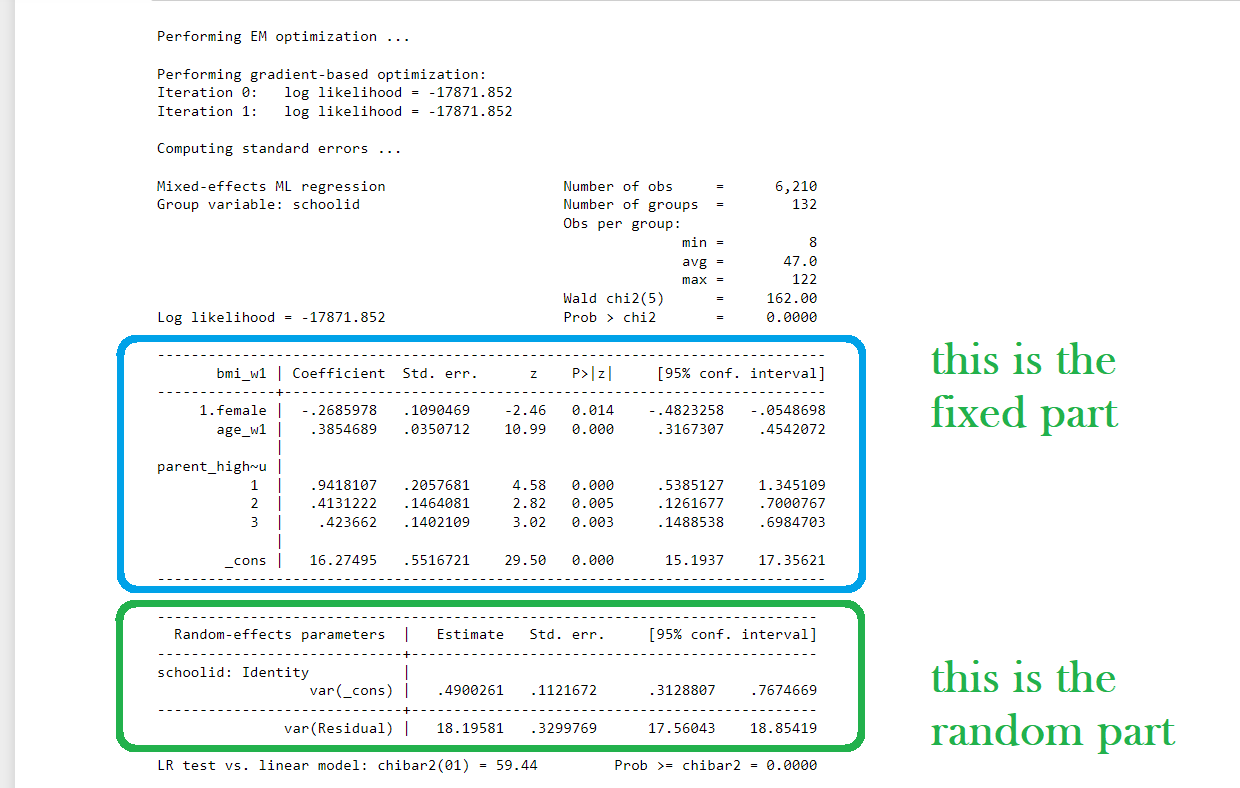

Here, we find that women report significantly lower BMI as compared to men. As age increases there is a significant increase in BMI. We find BMI significantly decreases as parent's educational attainment increases.

The random effect for the school level: $\sigma^2_{\mu0} = .490$

The random effect for the school level: $\sigma^2_{e0} = 18.196$

### Intraclass coefficient (ICC)
This test statistic tell you how much the variation of the outcome variable is explained by the second level. 

<center>$ICC = \frac{Variation at Level 2}{Total variation}$

<center>$\frac{variation at level 2}{Variation at level 2 + variation at level 1}$

<center>$ \rho = \frac{\sigma^2_{\mu0}}{\sigma^2_{\mu0}+\sigma^2_{e0}}$

We report ICC as a percent, so mutiple it by 100.

We interpret it by saying, $\rho$ percent of the outcome is explained by the second level. The rule of thumb for a good ICC is 5%.

In the example above,

$\frac{.490}{.490+18.196}=.026$

In [4]:
di .490/(.490+18.196)

.02622284


In [3]:
*You can also ask stata to estimate the icc.
estat icc


Residual intraclass correlation

------------------------------------------------------------------------------
                       Level |        ICC   Std. err.     [95% conf. interval]
-----------------------------+------------------------------------------------
                    schoolid |   .0262245    .005894      .0168426    .0406164
------------------------------------------------------------------------------


### Caterpillar plots: Expected values
With multilevel modeling we can plot the expected values of the each school.

In [39]:
use "addhealth.dta", clear
quietly mixed bmi_w1 i.female age_w1 ib4.parent_highestedu || schoolid:
*This makes the predicted values with school-specific clusters
predict bmi_fixed, fitted
*This makes the standard error for the fixed part predicted values 
predict bmi_fixed_se, stdp
*This estimates the random part of school and individual
predict u0, reffects
*This calculates the standard errors of the random part
predict u0_se, reses




(90 missing values generated)

(90 missing values generated)




In [40]:
*calculates 95% confidence interval (1.96se) and adds the standard error of both fixed and random
gen totse=(bmi_fixed_se+u0_se)*1.96
*calculating the lower 95% CI bound
gen explo=bmi_fixed-totse
*calculating the upper 95% CI bound
gen exphi=bmi_fixed+totse


(90 missing values generated)

(90 missing values generated)

(90 missing values generated)


In [42]:
*The following three lines must be ran together.
sort schoolid
by schoolid: gen selectfromlist= (_n==1)
*to check if code worked
sort selectfromlist

In [ ]:
*These set of commands only keeps school-level data.
keep if selectfromlist==1

sort bmi_fixed
gen plot=_n

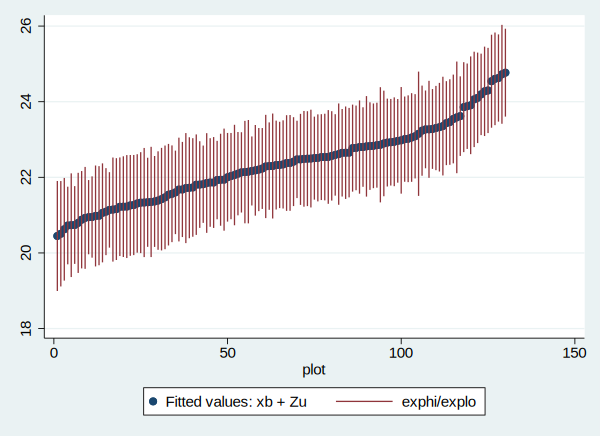




(note: file caterpillar_exp_value_bmi_w1.png not found)
(file caterpillar_exp_value_bmi_w1.png written in PNG format)


In [48]:
twoway ///
    (scatter bmi_fixed plot) ///
    (rspike exphi explo plot)
graph export "caterpillar_exp_value_bmi_w1.png", replace width(3400)

This is such an important figure. The points are the expected value of BMI with the model. The red spikes are the 95% confidence interval. You can see the range of predicted BMI for each school.

In [32]:
sort plot

Open the data and look at the plot and schoolid to see which school has higher or lower predicted BMI.

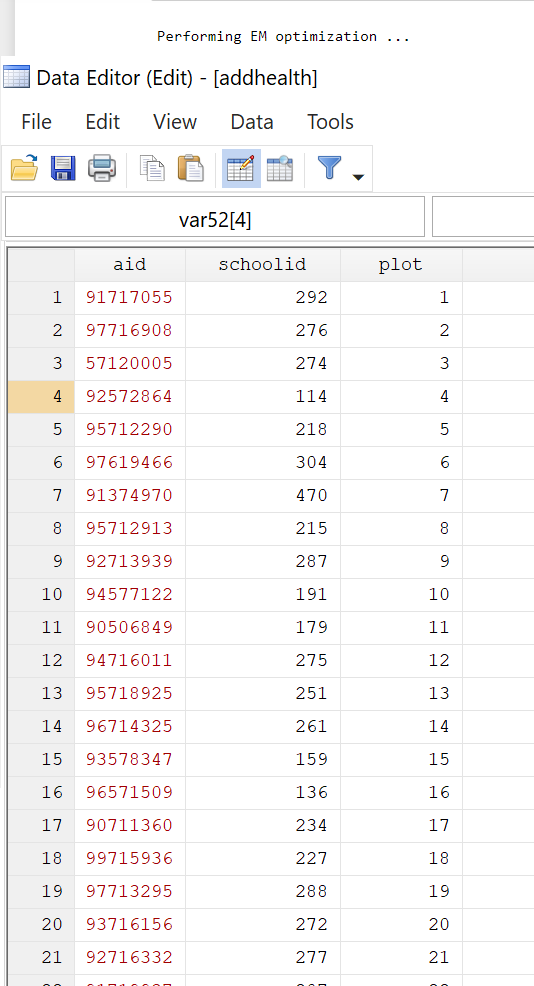

### Caterpillar plots: Random part
With multilevel modeling we can plot the random part of the each school.

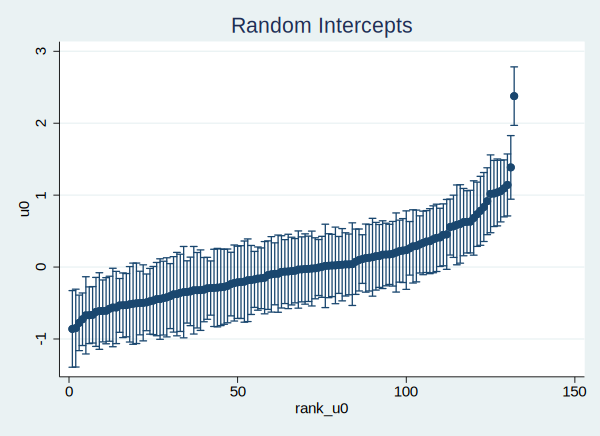











(file caterpillar_rand_inter_bmi_w1_age.png written in PNG format)


In [50]:
use "addhealth.dta", clear
quietly mixed bmi_w1 i.female age_w1 ib4.parent_highestedu || schoolid:
*This estimates the random part of school and individual
predict u0, reffects
*This calculates the standard errors of the random part
predict u0_se, reses
by school, sort: generate graphme = (_n==1)

sort u0
gen rank_u0 = sum(graphme)
serrbar u0 u0_se rank_u0 if graphme, ytitle(u0) title(Random Intercepts)
graph export "caterpillar_rand_inter_bmi_w1_age.png", replace width(3400)

This figure is just the random parts for each school. If the school reports higher than 0, that means they are above the average. If the school reports lower than 0, that means they are below the average. Again we go and check the data.

In [51]:
sort graphme rank_u0

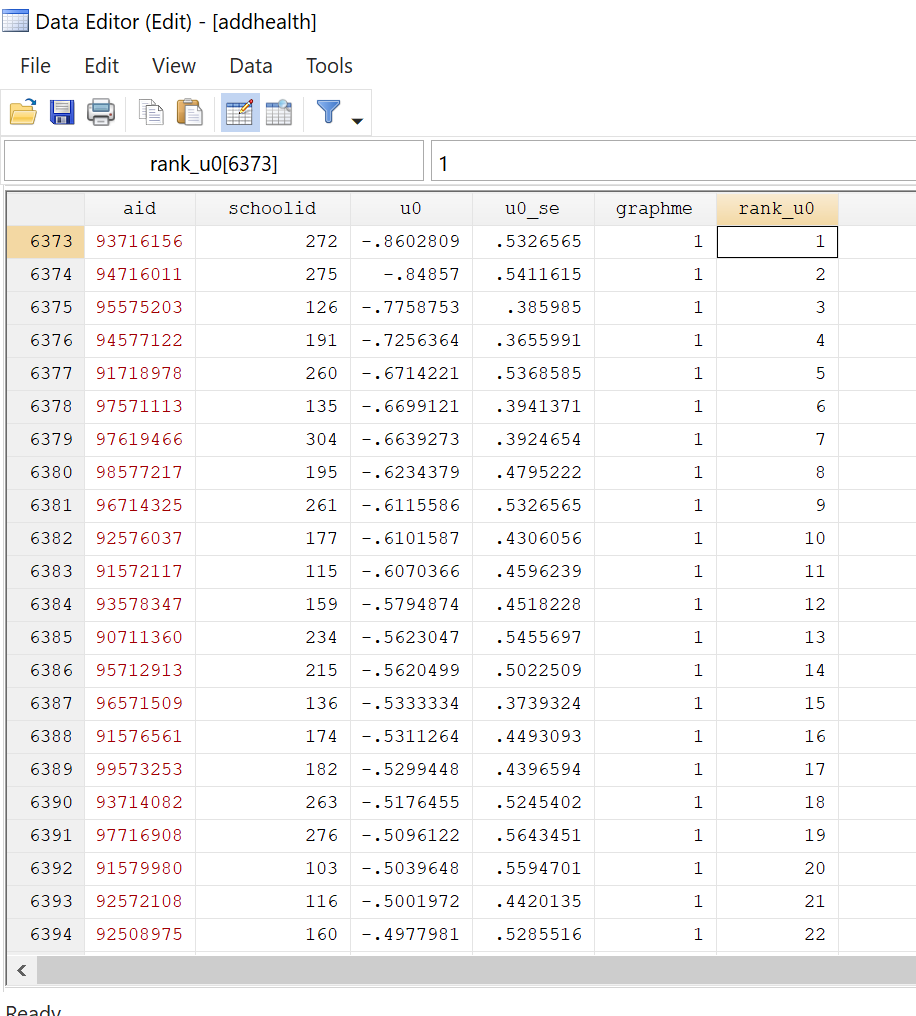

We see here that schoolid=272 has the lowest random part, followed by 275.

## Practice problems

1) Esimtate a two level model of adolecents nested within schools. Outcome variable is depress score (cesd). Independent variables: hrs_sleep, hrs_worked, female, and parent's highest education (where reference category is =4). How many observations and schools are estimated in the model? Interpret the coefficient results. Make sure to re-open the data.

2) Calculate the ICC manually and then check your results with the estat icc command.

3) Use the predict command to estimate and make variables of the fixed and random parts. Make sure to also estimate standard errors of the fixed and random parts.

4) Make a caterpillar plot of the expected value for the every school.

5) Make a caterpillar plot of the random part for the every school.

Answers are below.

In [54]:
*If you use the same variable names as earlier, you should re-open the data.
use "addhealth.dta", clear
mixed cesd i.female hrs_sleep hrs_worked ib4.parent_highestedu || schoolid:




Performing EM optimization: 

Performing gradient-based optimization: 

Iteration 0:   log likelihood = -20876.879  
Iteration 1:   log likelihood = -20876.877  
Iteration 2:   log likelihood = -20876.877  

Computing standard errors:

Mixed-effects ML regression                     Number of obs     =      6,334
Group variable: schoolid                        Number of groups  =        132

                                                Obs per group:
                                                              min =         12
                                                              avg =       48.0
                                                              max =        122

                                                Wald chi2(6)      =     345.44
Log likelihood = -20876.877                     Prob > chi2       =     0.0000

-------------------------------------------------------------------------------
         cesd |      Coef.   Std. Err.      z    P>|z|     [95

There are 6,334 observations in the data and 132 schools. We find that women are significantly more likely to have higher depression scores. Additionally, the is a significant negative relationship between hours sleep and depression where as the hours of sleep decreases there is a corresponding increase in depression score. The results report that as the number of hours worked increases there is a significant increase in depression score. Finally, respondents with lower parent's educational attainment report more depression (significant).

In [24]:
di .6285128/(.6285128+42.23385)

.01466351


In [25]:
estat icc


Residual intraclass correlation

------------------------------------------------------------------------------
                       Level |        ICC   Std. Err.     [95% Conf. Interval]
-----------------------------+------------------------------------------------
                    schoolid |   .0146635   .0044567      .0080645    .0265179
------------------------------------------------------------------------------


The ICC is 1.5% showing there isn't much clustering of the outcome variable happening at the school level.




(168 missing values generated)

(168 missing values generated)



(168 missing values generated)

(168 missing values generated)

(168 missing values generated)




(6,372 observations deleted)


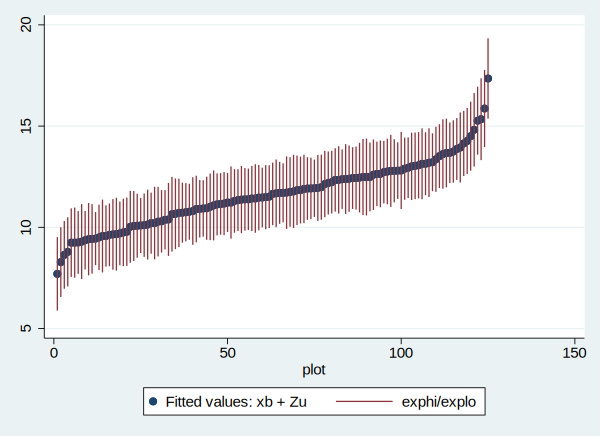






(file caterpillar_exp_value_cesd.png written in PNG format)


In [53]:
*If you use the same variable names as earlier, you should re-open the data.
use "addhealth.dta", clear
quietly mixed cesd i.female hrs_sleep hrs_worked ib4.parent_highestedu || schoolid:

*This makes the predicted values with school-specific clusters
predict cesd_fixed, fitted
*This makes the standard error for the fixed part predicted values 
predict cesd_fixed_se, stdp
*This estimates the random part of school and individual
predict u0, reffects
*This calculates the standard errors of the random part
predict u0_se, reses

*calculates 95% confidence interval (1.96se) and adds the standard error of both fixed and random
gen totse=(cesd_fixed_se+u0_se)*1.96
*calculating the lower 95% CU bound
gen explo=cesd_fixed-totse
*calculating the upper 95% CU bound
gen exphi=cesd_fixed+totse

*The following three lines must be ran together.
sort schoolid
by schoolid: gen selectfromlist= (_n==1)
*to check if code worked
sort selectfromlist

keep if selectfromlist==1

sort cesd_fixed
gen plot=_n

twoway ///
    (scatter cesd_fixed plot) ///
    (rspike exphi explo plot)
graph export "caterpillar_exp_value_cesd.png", replace width(3400)

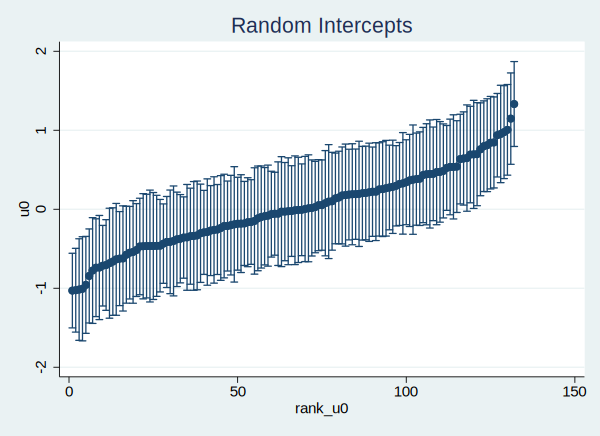











(note: file caterpillar_random_part_cesd.png not found)
(file caterpillar_random_part_cesd.png written in PNG format)


In [56]:
use "addhealth.dta", clear
quietly mixed cesd i.female hrs_sleep hrs_worked ib4.parent_highestedu || schoolid:
predict u0, reffects
*This calculates the standard errors of the random part
predict u0_se, reses
by school, sort: generate graphme = (_n==1)

sort u0
gen rank_u0 = sum(graphme)
serrbar u0 u0_se rank_u0 if graphme, ytitle(u0) title(Random Intercepts)
graph export "caterpillar_random_part_cesd.png", replace width(3400)